In [1]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

# 画图工具
import matplotlib.pyplot as plt
%matplotlib inline

/home/lxc/.virtualenvs/shujufenxi/lib/python3.7/site-packages/pandas/compat/__init__.py:117: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
# 读取用户user
labels = ['UserId','Gender','Age','Occupation','zip-code']

users = pd.read_csv('./users.dat',sep='::',header=None, names=labels)
users.shape

/home/lxc/.virtualenvs/shujufenxi/lib/python3.7/site-packages/ipykernel_launcher.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  after removing the cwd from sys.path.


(6040, 5)

In [3]:
users.head()

,UserId,Gender,Age,Occupation,zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [4]:
# movie
# MovieID::Title::Genres
labels = ['MovieId','Title','Genres']

movie = pd.read_csv('./movies.dat',sep='::',header=None,names=labels)

display(movie.head(),movie.shape)

/home/lxc/.virtualenvs/shujufenxi/lib/python3.7/site-packages/ipykernel_launcher.py:5: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """


,MovieId,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


(3883, 3)

In [5]:
# 评分
# UserID::MovieID::Rating::Timestamp
labels = ['UserId','MovieId','Rating','Timestamp']

ratings = pd.read_csv('./ratings.dat',sep='::',header=None,names=labels)

display(ratings.head(),ratings.shape)

/home/lxc/.virtualenvs/shujufenxi/lib/python3.7/site-packages/ipykernel_launcher.py:5: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """


,UserId,MovieId,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


(1000209, 4)

In [ ]:
###数据合并   专业词汇  数据集成

In [6]:
display(users.head(),movie.head(),ratings.head())

,UserId,Gender,Age,Occupation,zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


,MovieId,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


,UserId,MovieId,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [7]:
# 合并Movie Ratings
df1 = pd.merge(left=movie,right=ratings)
df1.head()

,MovieId,Title,Genres,UserId,Rating,Timestamp
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268
1,1,Toy Story (1995),Animation|Children's|Comedy,6,4,978237008
2,1,Toy Story (1995),Animation|Children's|Comedy,8,4,978233496
3,1,Toy Story (1995),Animation|Children's|Comedy,9,5,978225952
4,1,Toy Story (1995),Animation|Children's|Comedy,10,5,978226474


In [8]:
movie_data = pd.merge(df1,users)

In [9]:
movie_data.shape

(1000209, 10)

In [10]:
movie_data.head(30)

,MovieId,Title,Genres,UserId,Rating,Timestamp,Gender,Age,Occupation,zip-code
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,F,1,10,48067
2,150,Apollo 13 (1995),Drama,1,5,978301777,F,1,10,48067
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,F,1,10,48067
4,527,Schindler's List (1993),Drama|War,1,5,978824195,F,1,10,48067
5,531,"Secret Garden, The (1993)",Children's|Drama,1,4,978302149,F,1,10,48067
6,588,Aladdin (1992),Animation|Children's|Comedy|Musical,1,4,978824268,F,1,10,48067
7,594,Snow White and the Seven Dwarfs (1937),Animation|Children's|Musical,1,4,978302268,F,1,10,48067
8,595,Beauty and the Beast (1991),Animation|Children's|Musical,1,5,978824268,F,1,10,48067
9,608,Fargo (1996),Crime|Drama|Thriller,1,4,978301398,F,1,10,48067


In [11]:
movie_data['Age'].unique()

array([ 1, 50, 25, 35, 18, 45, 56])

In [12]:
movie_rate_mean = pd.pivot_table(movie_data, values=['Rating'],index=['Title'],aggfunc='mean')
movie_rate_mean.shape

(3706, 1)

In [13]:
movie_rate_mean.head()

,Rating
Title,
"$1,000,000 Duck (1971)",3.027027
'Night Mother (1986),3.371429
'Til There Was You (1997),2.692308
"'burbs, The (1989)",2.910891
...And Justice for All (1979),3.713568


In [14]:
# 查询高分电影
movie_rate_mean.sort_values(by=['Rating'],ascending=False,inplace=True)

In [15]:
movie_rate_mean[:20]

,Rating
Title,
Ulysses (Ulisse) (1954),5.000000
Lured (1947),5.000000
Follow the Bitch (1998),5.000000
Bittersweet Motel (2000),5.000000
Song of Freedom (1936),5.000000
One Little Indian (1973),5.000000
Smashing Time (1967),5.000000
Schlafes Bruder (Brother of Sleep) (1995),5.000000
"Gate of Heavenly Peace, The (1995)",5.000000


In [16]:
movie_rate_mean[-20:]

,Rating
Title,
Lotto Land (1995),1.0
Nueba Yol (1995),1.0
Even Dwarfs Started Small (Auch Zwerge haben klein angefangen) (1971),1.0
Get Over It (1996),1.0
Venice/Venice (1992),1.0
Sleepover (1995),1.0
"Silence of the Palace, The (Saimt el Qusur) (1994)",1.0
Waltzes from Vienna (1933),1.0
Wirey Spindell (1999),1.0


In [17]:
#   不同性别对电影的平均评分
# 头师表  透视数据结构
movie_gender_rating_mean = pd.pivot_table(movie_data,values=['Rating'],index=['Title','Gender'],aggfunc='mean')
movie_gender_rating_mean.head()

Rating
Title                     Gender          
$1,000,000 Duck (1971)    F       3.375000
                          M       2.761905
'Night Mother (1986)      F       3.388889
                          M       3.352941
'Til There Was You (1997) F       2.675676

In [18]:
movie_gender_rating_mean = pd.pivot_table(movie_data,values='Rating',index=['Title'],columns=['Gender'],aggfunc='mean')
movie_gender_rating_mean.shape

(3706, 2)

In [19]:
movie_gender_rating_mean.head()

Gender,F,M
Title,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Night Mother (1986),3.388889,3.352941
'Til There Was You (1997),2.675676,2.733333
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024


In [20]:
# 不同性别争议最大的电影

In [21]:
movie_gender_rating_mean.columns

Index(['F', 'M'], dtype='object', name='Gender')

In [22]:
# 女性用户和男性用户对电影评分的差异
movie_gender_rating_mean['diff'] = movie_gender_rating_mean.F - movie_gender_rating_mean.M

In [23]:
movie_gender_rating_mean.head()

Gender,F,M,diff
Title,,,
"$1,000,000 Duck (1971)",3.375000,2.761905,0.613095
'Night Mother (1986),3.388889,3.352941,0.035948
'Til There Was You (1997),2.675676,2.733333,-0.057658
"'burbs, The (1989)",2.793478,2.962085,-0.168607
...And Justice for All (1979),3.828571,3.689024,0.139547


In [24]:
#排序
movie_gender_rating_mean.sort_values(by='diff',ascending=False,inplace=True)

In [25]:
movie_gender_rating_mean.head()

Gender,F,M,diff
Title,,,
"James Dean Story, The (1957)",4.000000,1.000000,3.000000
"Spiders, The (Die Spinnen, 1. Teil: Der Goldene See) (1919)",4.000000,1.000000,3.000000
Country Life (1994),5.000000,2.000000,3.000000
Babyfever (1994),3.666667,1.000000,2.666667
"Woman of Paris, A (1923)",5.000000,2.428571,2.571429


In [26]:
# 女性用户和男性用户对电影评分的差异最大  且女性最喜欢
f = movie_gender_rating_mean[:10]
f

Gender,F,M,diff
Title,,,
"James Dean Story, The (1957)",4.000000,1.000000,3.000000
"Spiders, The (Die Spinnen, 1. Teil: Der Goldene See) (1919)",4.000000,1.000000,3.000000
Country Life (1994),5.000000,2.000000,3.000000
Babyfever (1994),3.666667,1.000000,2.666667
"Woman of Paris, A (1923)",5.000000,2.428571,2.571429
Cobra (1925),4.000000,1.500000,2.500000
"Other Side of Sunday, The (S�ndagsengler) (1996)",5.000000,2.928571,2.071429
Theodore Rex (1995),3.000000,1.000000,2.000000
For the Moment (1994),5.000000,3.000000,2.000000


In [27]:
m = movie_gender_rating_mean.dropna()[-10:]
m

Gender,F,M,diff
Title,,,
Jamaica Inn (1939),1.0,3.142857,-2.142857
"Flying Saucer, The (1950)",1.0,3.300000,-2.300000
Rosie (1998),1.0,3.333333,-2.333333
In God's Hands (1998),1.0,3.333333,-2.333333
Dangerous Ground (1997),1.0,3.333333,-2.333333
Killer: A Journal of Murder (1995),1.0,3.428571,-2.428571
Stalingrad (1993),1.0,3.593750,-2.593750
"Enfer, L' (1994)",1.0,3.750000,-2.750000
"Neon Bible, The (1995)",1.0,4.000000,-3.000000


In [28]:
diff = pd.concat([f,m])
diff

Gender,F,M,diff
Title,,,
"James Dean Story, The (1957)",4.000000,1.000000,3.000000
"Spiders, The (Die Spinnen, 1. Teil: Der Goldene See) (1919)",4.000000,1.000000,3.000000
Country Life (1994),5.000000,2.000000,3.000000
Babyfever (1994),3.666667,1.000000,2.666667
"Woman of Paris, A (1923)",5.000000,2.428571,2.571429
Cobra (1925),4.000000,1.500000,2.500000
"Other Side of Sunday, The (S�ndagsengler) (1996)",5.000000,2.928571,2.071429
Theodore Rex (1995),3.000000,1.000000,2.000000
For the Moment (1994),5.000000,3.000000,2.000000


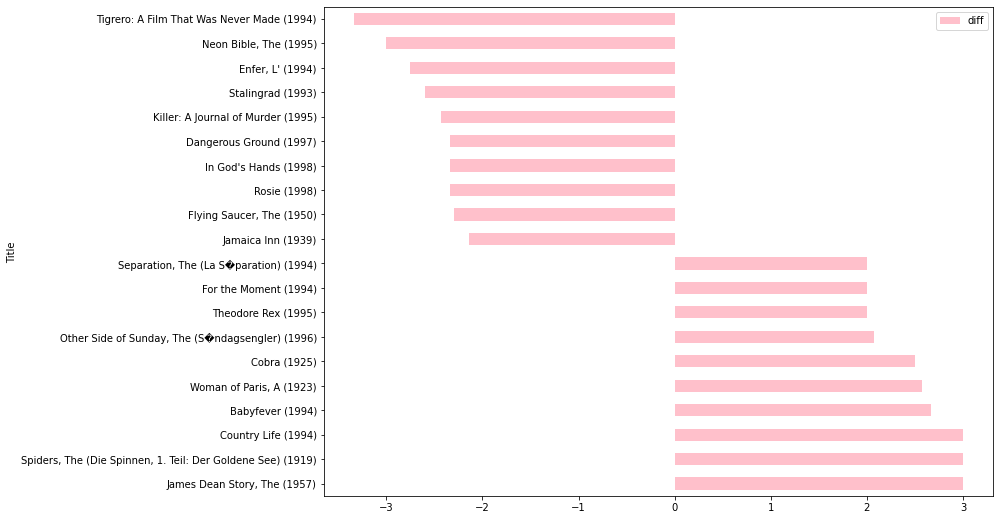

In [29]:
# 分析结果
# 数据可视化
# barh水平柱状图
diff.plot(y='diff',kind = 'barh',figsize=(12,9),color='pink')

In [30]:
# 评分次数最多的热门电影
  # pandas分组运算
movie_data.shape

(1000209, 10)

In [31]:
rating_count = movie_data.groupby(['Title']).size()
rating_count.sort_values(ascending=False) # 排序

Title
American Beauty (1999)                                   3428
Star Wars: Episode IV - A New Hope (1977)                2991
Star Wars: Episode V - The Empire Strikes Back (1980)    2990
Star Wars: Episode VI - Return of the Jedi (1983)        2883
Jurassic Park (1993)                                     2672
                                                         ... 
Anna (1996)                                                 1
McCullochs, The (1975)                                      1
Shadows (Cienie) (1988)                                     1
Night Tide (1961)                                           1
Another Man's Poison (1952)                                 1
Length: 3706, dtype: int64

In [32]:
# 查看不同年龄段争议最大的电影
movie_data.head()

,MovieId,Title,Genres,UserId,Rating,Timestamp,Gender,Age,Occupation,zip-code
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,F,1,10,48067
2,150,Apollo 13 (1995),Drama,1,5,978301777,F,1,10,48067
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,F,1,10,48067
4,527,Schindler's List (1993),Drama|War,1,5,978824195,F,1,10,48067


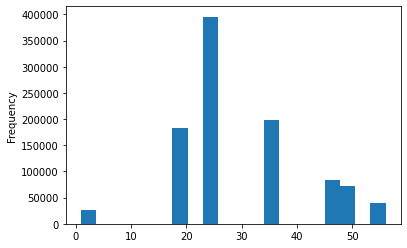

In [33]:
movie_data['Age'].plot(kind = 'hist',bins = 20)

In [34]:
movie_data.Age.max()

56

In [35]:
# 用pandas.cut函数将用户年龄分组
labels = ['1-9','10-19','20-29','30-39','40-49','50-59']
movie_data['Age_range'] = pd.cut(movie_data.Age,bins=range(0,61,10),labels=labels)# bins范围(区间，间隔)
movie_data.head()

,MovieId,Title,Genres,UserId,Rating,Timestamp,Gender,Age,Occupation,zip-code,Age_range
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067,1-9
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,F,1,10,48067,1-9
2,150,Apollo 13 (1995),Drama,1,5,978301777,F,1,10,48067,1-9
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,F,1,10,48067,1-9
4,527,Schindler's List (1993),Drama|War,1,5,978824195,F,1,10,48067,1-9


In [36]:
# 每个年龄段用户评分人数和打分偏好
movie_data.groupby('Age_range').agg({'Rating':[np.size,np.mean]})

Rating          
             size      mean
Age_range                  
1-9         27211  3.549520
10-19      183536  3.507573
20-29      395556  3.545235
30-39      199003  3.618162
40-49      156123  3.673559
50-59       38780  3.766632

In [37]:
movie_rate_mean.head()

,Rating
Title,
Ulysses (Ulisse) (1954),5.0
Lured (1947),5.0
Follow the Bitch (1998),5.0
Bittersweet Motel (2000),5.0
Song of Freedom (1936),5.0


In [38]:
movie_gender_rating_mean.head()

Gender,F,M,diff
Title,,,
"James Dean Story, The (1957)",4.000000,1.000000,3.000000
"Spiders, The (Die Spinnen, 1. Teil: Der Goldene See) (1919)",4.000000,1.000000,3.000000
Country Life (1994),5.000000,2.000000,3.000000
Babyfever (1994),3.666667,1.000000,2.666667
"Woman of Paris, A (1923)",5.000000,2.428571,2.571429


In [39]:
top_movie_title = movie_data.groupby('Title').size().sort_values()[::-1][:50].index
top_movie_title

Index(['American Beauty (1999)', 'Star Wars: Episode IV - A New Hope (1977)',
       'Star Wars: Episode V - The Empire Strikes Back (1980)',
       'Star Wars: Episode VI - Return of the Jedi (1983)',
       'Jurassic Park (1993)', 'Saving Private Ryan (1998)',
       'Terminator 2: Judgment Day (1991)', 'Matrix, The (1999)',
       'Back to the Future (1985)', 'Silence of the Lambs, The (1991)',
       'Men in Black (1997)', 'Raiders of the Lost Ark (1981)', 'Fargo (1996)',
       'Sixth Sense, The (1999)', 'Braveheart (1995)',
       'Shakespeare in Love (1998)', 'Princess Bride, The (1987)',
       'Schindler's List (1993)', 'L.A. Confidential (1997)',
       'Groundhog Day (1993)', 'E.T. the Extra-Terrestrial (1982)',
       'Star Wars: Episode I - The Phantom Menace (1999)',
       'Being John Malkovich (1999)', 'Shawshank Redemption, The (1994)',
       'Godfather, The (1972)', 'Forrest Gump (1994)', 'Ghostbusters (1984)',
       'Pulp Fiction (1994)', 'Terminator, The (1984)', 

In [40]:
flag = movie_gender_rating_mean.index.isin(top_movie_title)
flag

array([False, False, False, ..., False, False, False])

In [41]:
df1 = movie_gender_rating_mean[flag].sort_values(by='diff')
df1

Gender,F,M,diff
Title,,,
Airplane! (1980),3.656566,4.064419,-0.407854
"Godfather: Part II, The (1974)",4.040936,4.437778,-0.396842
Aliens (1986),3.802083,4.186684,-0.384601
Terminator 2: Judgment Day (1991),3.785088,4.115367,-0.330279
Alien (1979),3.888252,4.216119,-0.327867
"Terminator, The (1984)",3.899729,4.205899,-0.306170
Groundhog Day (1993),3.735562,4.041358,-0.305796
2001: A Space Odyssey (1968),3.825581,4.129738,-0.304156
Saving Private Ryan (1998),4.114783,4.398941,-0.284159


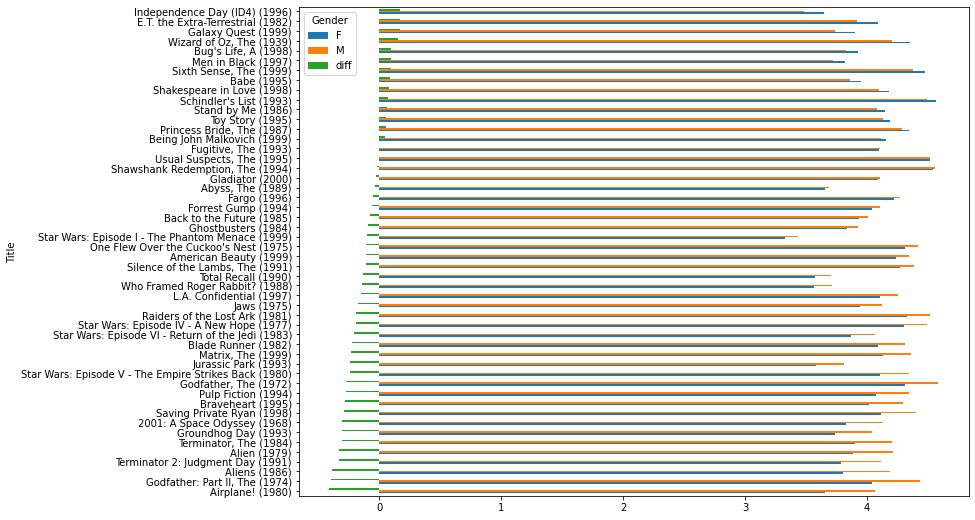

In [42]:
# 评分次数最多的50部电影在不同年龄阶段的打分差异
df1.plot(kind = 'barh',figsize=(12,9))

In [43]:
# 加入评分次数限制的分析平均高分电影
movie_rating_mean = pd.pivot_table(movie_data,values='Rating',index=['Title'])


In [44]:
index = movie_data.groupby('Title').size().sort_values()[::-1][:50].index
index

Index(['American Beauty (1999)', 'Star Wars: Episode IV - A New Hope (1977)',
       'Star Wars: Episode V - The Empire Strikes Back (1980)',
       'Star Wars: Episode VI - Return of the Jedi (1983)',
       'Jurassic Park (1993)', 'Saving Private Ryan (1998)',
       'Terminator 2: Judgment Day (1991)', 'Matrix, The (1999)',
       'Back to the Future (1985)', 'Silence of the Lambs, The (1991)',
       'Men in Black (1997)', 'Raiders of the Lost Ark (1981)', 'Fargo (1996)',
       'Sixth Sense, The (1999)', 'Braveheart (1995)',
       'Shakespeare in Love (1998)', 'Princess Bride, The (1987)',
       'Schindler's List (1993)', 'L.A. Confidential (1997)',
       'Groundhog Day (1993)', 'E.T. the Extra-Terrestrial (1982)',
       'Star Wars: Episode I - The Phantom Menace (1999)',
       'Being John Malkovich (1999)', 'Shawshank Redemption, The (1994)',
       'Godfather, The (1972)', 'Forrest Gump (1994)', 'Ghostbusters (1984)',
       'Pulp Fiction (1994)', 'Terminator, The (1984)', 

In [45]:
flag = movie_ratinf_mean.index.isin(index)
# 热门电影平均分
movie_rating_top_mean = movie_rating_mean[flag]


NameError: name 'movie_ratinf_mean' is not defined

In [46]:
movie_rating_top_mean.sort_values(by='Rating',ascending=False)

NameError: name 'movie_rating_top_mean' is not defined